<a href="https://colab.research.google.com/github/andy9806/MachineLearning_23/blob/main/andy9806/0320_1(linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://github.com/BigData23th/Data/raw/main/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
import seaborn as sns

<Axes: xlabel='expenses', ylabel='Count'>

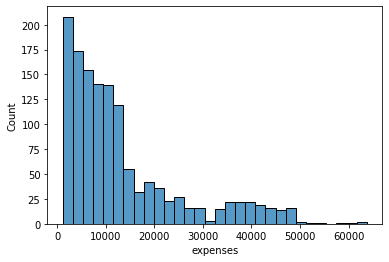

In [ ]:
sns.histplot(data=df,x='expenses')

<Axes: xlabel='sex', ylabel='expenses'>

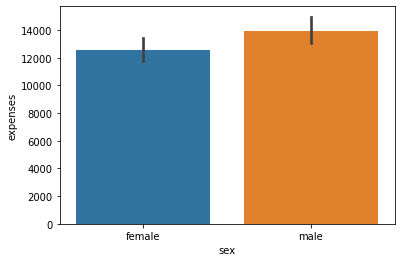

In [ ]:
sns.barplot(data=df,x='sex',y='expenses')

<Axes: xlabel='age', ylabel='Count'>

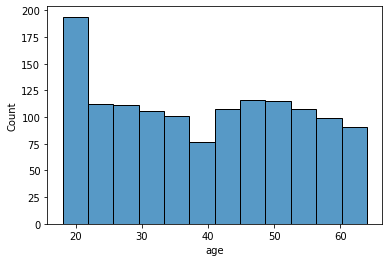

In [ ]:
sns.histplot(data=df,x='age')

In [ ]:
df.smoker.map({'yes':1,'no':0}).apply(int)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
df.smoker.apply(lambda x: int(x=='yes'))

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
# (df.smoker == 'yes') +0
# (df.smoker == 'yes') *1
# df.smoker.eq('yes').mul(1)
# df.smoker.eq('yes').add(0)

In [ ]:
pd.get_dummies(df.smoker,drop_first=True)

,yes
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [ ]:
df = pd.get_dummies(df,columns=['smoker'],drop_first=True)
df

,age,sex,bmi,children,region,expenses,smoker_yes
0,19,female,27.9,0,southwest,16884.92,1
1,18,male,33.8,1,southeast,1725.55,0
2,28,male,33.0,3,southeast,4449.46,0
3,33,male,22.7,0,northwest,21984.47,0
4,32,male,28.9,0,northwest,3866.86,0
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,northwest,10600.55,0
1334,18,female,31.9,0,northeast,2205.98,0
1335,18,female,36.9,0,southeast,1629.83,0
1336,21,female,25.8,0,southwest,2007.95,0


In [ ]:
df.rename(columns={'smoker_yes':'smoker'},inplace=True)

In [ ]:
df.head()

,age,sex,bmi,children,region,expenses,smoker
0,19,female,27.9,0,southwest,16884.92,1
1,18,male,33.8,1,southeast,1725.55,0
2,28,male,33.0,3,southeast,4449.46,0
3,33,male,22.7,0,northwest,21984.47,0
4,32,male,28.9,0,northwest,3866.86,0


In [ ]:
df = pd.get_dummies(df,columns=['region','sex'],drop_first=True)
df

,age,bmi,children,expenses,smoker,region_northwest,region_southeast,region_southwest,sex_male
0,19,27.9,0,16884.92,1,0,0,1,0
1,18,33.8,1,1725.55,0,0,1,0,1
2,28,33.0,3,4449.46,0,0,1,0,1
3,33,22.7,0,21984.47,0,1,0,0,1
4,32,28.9,0,3866.86,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,0,0,1
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,1,0,0
1336,21,25.8,0,2007.95,0,0,0,1,0


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = df.drop(columns='expenses')
y = df.expenses

In [ ]:
X.head()

,age,bmi,children,smoker,region_northwest,region_southeast,region_southwest,sex_male
0,19,27.9,0,1,0,0,1,0
1,18,33.8,1,0,0,1,0,1
2,28,33.0,3,0,0,1,0,1
3,33,22.7,0,0,1,0,0,1
4,32,28.9,0,0,1,0,0,1


In [ ]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
train_test_split(X,y,test_size=0.2,random_state=20)

[      age   bmi  children  smoker  region_northwest  region_southeast  \
 1204   18  27.3         3       1                 0                 1   
 829    39  21.9         1       0                 1                 0   
 1077   21  26.0         0       0                 0                 0   
 416    52  34.1         0       0                 0                 1   
 1295   20  22.0         1       0                 0                 0   
 ...   ...   ...       ...     ...               ...               ...   
 1242   22  21.3         3       0                 1                 0   
 924    43  23.2         0       0                 0                 0   
 1247   33  29.4         4       0                 0                 0   
 271    50  34.2         2       1                 0                 0   
 474    54  25.1         3       1                 0                 0   
 
       region_southwest  sex_male  
 1204                 0         0  
 829                  0         1  
 1

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)

0.7959358662345163

In [ ]:
comparison = pd.DataFrame({
    'actual':y_test,
    'pred':pred
})
comparison

,actual,pred
698,10976.25,13305.674553
520,25656.58,9983.611210
1144,9630.40,11682.243737
908,15170.07,18032.375516
559,1646.43,4740.799751
...,...,...
851,14119.62,15203.140686
109,47055.53,38755.998869
941,9549.57,16287.891150
600,1633.04,5428.969455


<Axes: xlabel='actual', ylabel='pred'>

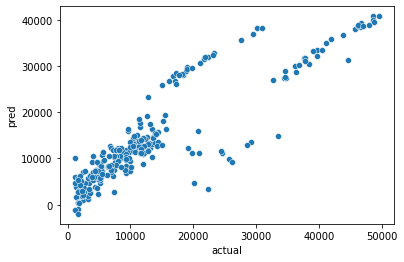

In [ ]:
import seaborn as sns
sns.scatterplot(data=comparison,x='actual',y='pred')

<Axes: xlabel='actual', ylabel='pred'>

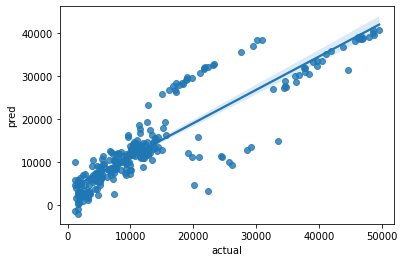

In [ ]:
sns.regplot(data=comparison,x='actual',y='pred')

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,pred)

30685749.465738006

In [ ]:
# mean_squared_error(y_test,pred,squared = False)
mean_squared_error(y_test,pred)**0.5  #rmse

5539.4719482761175

In [ ]:
model.score(X_test,y_test) #R**2

0.7959358662345163

In [ ]:
model.coef_ #계수

array([  248.0747473 ,   341.05047148,   567.28152844, 23717.79639542,
        -159.17943468,  -640.6454047 ,  -951.25416336,  -155.82367665])

In [ ]:
pd.Series(model.coef_,index=X.columns)

age                   248.074747
bmi                   341.050471
children              567.281528
smoker              23717.796395
region_northwest     -159.179435
region_southeast     -640.645405
region_southwest     -951.254163
sex_male             -155.823677
dtype: float64

In [ ]:
model.intercept_ #상수항

-11764.909073858324

In [ ]:
#@title 파일저장
!pip install mixtend -q

ERROR: Could not find a version that satisfies the requirement mixtend (from versions: none)
ERROR: No matching distribution found for mixtend


In [ ]:
import joblib
joblib.dump(model,'first_model.pkl')

['first_model.pkl']

In [ ]:
from google.colab import files
files.download('first_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model_from_joblib = joblib.load('first_model.pkl')
model_from_joblib

LinearRegression()

In [ ]:
pd.Series(model_from_joblib.coef_, index = X.columns)

age                   248.074747
bmi                   341.050471
children              567.281528
smoker              23717.796395
region_northwest     -159.179435
region_southeast     -640.645405
region_southwest     -951.254163
sex_male             -155.823677
dtype: float64